# Regresión logística

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("datasets/banco.csv", sep=";")
#data.shape
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


## Análisis exploratorio

Se realizaría una visualización y análisis de los datos para una mejor comprensión de los datos, balanceo de clases, etc.

In [3]:
data["y"].value_counts()

no     3668
yes     451
Name: y, dtype: int64

## Transformación de columnas
### Transformación de tipos de datos

In [4]:
data["y"] = (data["y"]=="yes").astype(int)

In [5]:
data["education"].unique()

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'unknown',
       'illiterate'], dtype=object)

In [6]:
data["education"] = np.where(data["education"]=="basic.4y", "Basic", data["education"])
data["education"] = np.where(data["education"]=="basic.6y", "Basic", data["education"])
data["education"] = np.where(data["education"]=="basic.9y", "Basic", data["education"])

data["education"] = np.where(data["education"]=="high.school", "High School", data["education"])
data["education"] = np.where(data["education"]=="professional.course", "Professional Course", data["education"])
data["education"] = np.where(data["education"]=="university.degree", "University Degree", data["education"])

data["education"] = np.where(data["education"]=="illiterate", "Illiterate", data["education"])
data["education"] = np.where(data["education"]=="unknown", "Unknown", data["education"])

### Transformación de variables categóricas a dummy

In [7]:
categories = ["job", "marital", "education", "housing", "loan", "contact", "month", "day_of_week", "poutcome"]
for category in categories:
    cat_list = "c"+ "_"+category
    cat_dummies = pd.get_dummies(data[category], prefix=category)
    data_new = data.join(cat_dummies)
    data = data_new

In [8]:
# eliminamos las columnas que han sido transformadas a dummy

data_vars = data.columns.values.tolist()
to_keep = [v for v in data_vars if v not in categories]
to_keep = [v for v in to_keep if v not in ["default"]]

df = data[to_keep]
df.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_High School',
       'education_Illiterate', 'education_Professional Course',
       'education_University Degree', 'education_Unknown', 'housing_no',
       'housing_unknown', 'housing_yes', 'loan_no', 'loan_unknown',
       'loan_yes', 'contact_cellular', 'contact_telephone', 'month_apr',
       'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'd

## Selección de características
### Columnas de entrada y salida, conjuntos de entrenamiento y test

In [28]:
train, test = train_test_split(df, test_size = 0.2)
train.head()

Y = ['y']
X = [v for v in df.columns.values.tolist() if v not in Y]

### Selección de rasgos

In [10]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [38]:
lr = LogisticRegression(max_iter = 10000)

rfe = RFE(lr, n_features_to_select=12)
rfe = rfe.fit(train[X], train[Y].values.ravel())

In [59]:
## rasgos seleccionados...
# rfe.support_ # variables seleccionadas
# rfe.ranking_ # orden de prioridad de selección
list(zip(train, rfe.support_, rfe.ranking_))

[('age', False, 37),
 ('duration', False, 43),
 ('campaign', False, 23),
 ('pdays', False, 47),
 ('previous', True, 1),
 ('emp.var.rate', False, 25),
 ('cons.price.idx', False, 35),
 ('cons.conf.idx', False, 29),
 ('euribor3m', True, 1),
 ('nr.employed', False, 40),
 ('y', False, 20),
 ('job_admin.', False, 2),
 ('job_blue-collar', True, 1),
 ('job_entrepreneur', False, 19),
 ('job_housemaid', True, 1),
 ('job_management', False, 13),
 ('job_retired', True, 1),
 ('job_self-employed', True, 1),
 ('job_services', False, 12),
 ('job_student', False, 31),
 ('job_technician', False, 10),
 ('job_unemployed', False, 41),
 ('job_unknown', False, 30),
 ('marital_divorced', False, 39),
 ('marital_married', False, 46),
 ('marital_single', False, 45),
 ('marital_unknown', False, 22),
 ('education_Basic', False, 21),
 ('education_High School', False, 11),
 ('education_Illiterate', False, 7),
 ('education_Professional Course', False, 8),
 ('education_University Degree', False, 36),
 ('education_Unkn

In [47]:
## Nos quedamos solo las relevantes
from itertools import compress

# Variables predictoras y variable a predecir
X_train = train[list(compress(train, rfe.support_))]
Y_train = train["y"]

X_test = test[list(compress(test, rfe.support_))]
Y_test = test["y"]

## Creación del modelo

Con el paquete sklearn

In [50]:
from sklearn import linear_model

In [66]:
model = linear_model.LogisticRegression()
model.fit(X_train, Y_train)

print("R2 para entrenamiento: " + str(model.score(X_train, Y_train))) # Cuanto mayor, mejor

R2 para entrenamiento: 0.8949924127465857


In [58]:
# OJO: si cogemos el valor medio, sin ningun modelo, 
# podemos decir siempre que el usuario "NO comprará" y acertaremos un 88,7% de las veces
1-Y_train.mean()

# Nuestro modelo apenas mejora un poco esta probabilidad de acierto.
# Es uno de los problemas del desbalanceo de clases.

0.8871016691957512

In [65]:
# Coeficiente de importancia de cada característica
pd.DataFrame(zip(X_train, np.transpose(model.coef_)))

,0,1
0,previous,[0.6781420113377167]
1,euribor3m,[-0.4073966630124031]
2,job_blue-collar,[-0.47777673546288746]
3,job_housemaid,[0.16646814714142927]
4,job_retired,[0.39764180217849376]
5,job_self-employed,[-0.5106283003798072]
6,contact_telephone,[-0.38861980144277836]
7,month_aug,[0.20456839455523307]
8,month_jun,[0.686100234696254]
9,month_mar,[1.8920951852128207]


# Validación del modelo

In [68]:
print("R2 para test:          " + str(model.score(X_test, Y_test)))

R2 para test:          0.9016990291262136


In [69]:
probs = model.predict_proba(X_test) 
probs

# La primera columna: probabilidad/seguridad de lo que digo
# La segunda columna: probabilidad de valor de salida, un valor > 0.5 se cataloga como Y y uno menor como N


array([[0.78383528, 0.21616472],
       [0.8093544 , 0.1906456 ],
       [0.7433054 , 0.2566946 ],
       ...,
       [0.95029864, 0.04970136],
       [0.84550425, 0.15449575],
       [0.87465341, 0.12534659]])

In [74]:
predicciones = model.predict(X_test)
predicciones

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,

In [84]:
np.bincount(predicciones)

array([798,  26], dtype=int64)

In [88]:
from sklearn import metrics

metrics.accuracy_score(Y_test, predicciones)

# con esta libreria metrics podemos saber cuanto estamos acertando.
# en este caso estamos acertando en el 90%, tanto de las veces que decimos SI COMPRA como las que predecimos NO COMPRA.

0.9016990291262136

## Matrices de confusión

In [92]:
prob = probs[:,1]
prob_df = pd.DataFrame(prob)

## Vamos a bajar el threshold a 0.1. Todo lo que esté por encima será entendido como un SI compra
threshold = 0.1
prob_df["prediccion"] = np.where(prob_df[0]>=threshold, 1, 0)
prob_df["real"] = list(Y_test)
prob_df

,0,prediccion,real
0,0.216165,1,1
1,0.190646,1,0
2,0.256695,1,1
3,0.052689,0,0
4,0.044434,0,0
...,...,...,...
819,0.041829,0,0
820,0.125347,1,0
821,0.049701,0,0
822,0.154496,1,0


In [94]:
matriz_de_confusion = pd.crosstab(prob_df.prediccion, prob_df.real)
matriz_de_confusion

real,0,1
prediccion,,
0,541,19
1,204,60


In [97]:
TN = matriz_de_confusion[0][0]
TP = matriz_de_confusion[1][1]
FN = matriz_de_confusion[0][1]
FP = matriz_de_confusion[1][0]

print("Sensibilidad:  " + str(TP/(TP+FN)))
print("Especificidad: " + str(1-TN/(TN+FP)))

Sensibilidad:  0.22727272727272727
Especificidad: 0.03392857142857142


### Curva ROC y AUC

Podríamos ir probando con distintos thresholds, y pintar una grafica enfrentando la Sensibilidad a la 1-Especificidad para visualizar la curva ROC manualmente.
O podemos usar una libreria que lo haga por nosotros.

In [99]:
# Es necesario instalar primero esta libreria
# pip install ggplot
# si ggplot da un error...
# Si ya instalaste el paquete ggplot, desde windows colocate sobre la carpeta que instalaste de Anaconda3 
#   y sigues la siguiente ruta Anaconda3/site-packages / ggplot / stats /  
#   y das doble click sobre el siguiente archivo smoothers.py  y se abrirá en forma de texto, 
#   hay una linea que dice "from pandas.lib import Timestamp", sólo borra de forma manual el ".lib" 
#   para que quede "from pandas import Timestamp", guardas y listo.
#   C:\Users\mjgs\Anaconda3\Lib\site-packages\ggplot\stats

from sklearn import metrics
from ggplot import *

In [110]:
espc_1, sensit, _ = metrics.roc_curve(Y_test, prob)

df = pd.DataFrame({
    "1-Especificidad": espc_1,
    "Sensibilidad": sensit
})
df.head()

,1-Especificidad,Sensibilidad
0,0.000000,0.000000
1,0.001342,0.000000
2,0.001342,0.012658
3,0.002685,0.012658
4,0.002685,0.037975


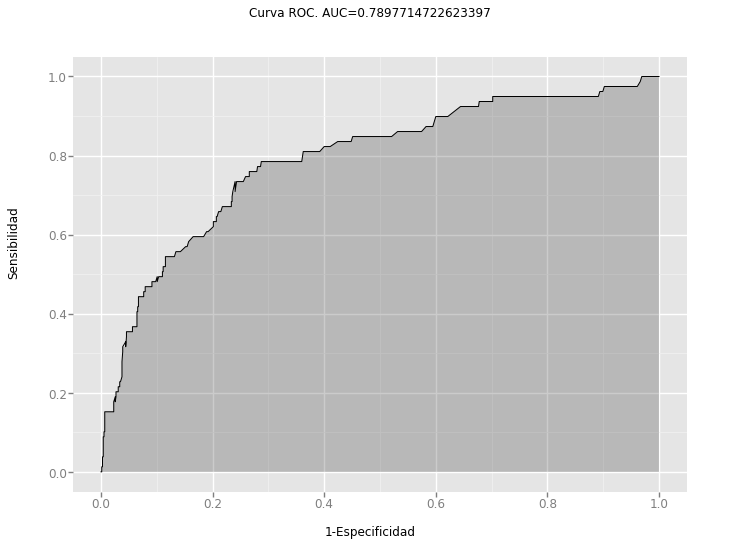

<ggplot: (126769141128)>

In [111]:
auc = metrics.auc(espc_1, sensit) #el area bajo la curva roc (area under curve)
ggplot(df, aes(x="1-Especificidad", y="Sensibilidad")) + geom_area(alpha=0.25) + geom_line(aes(y="Sensibilidad")) + ggtitle("Curva ROC. AUC=%s" % str(auc))